iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.3405781385207063
-1.7070486437797476


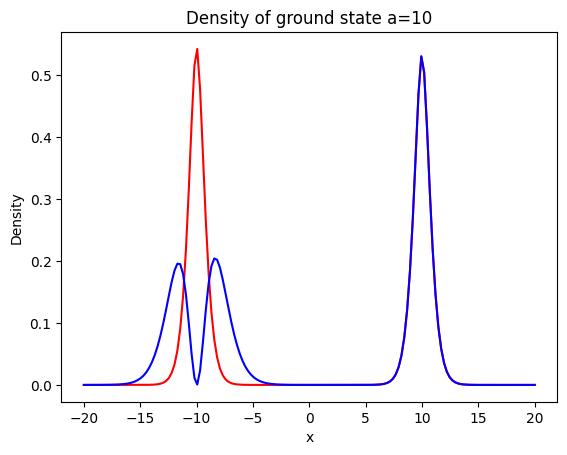

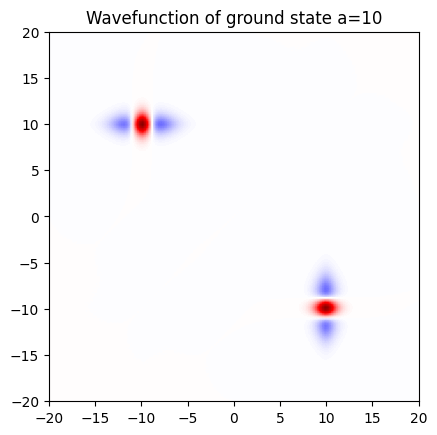

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.3470847241855064
-1.7138840337981662


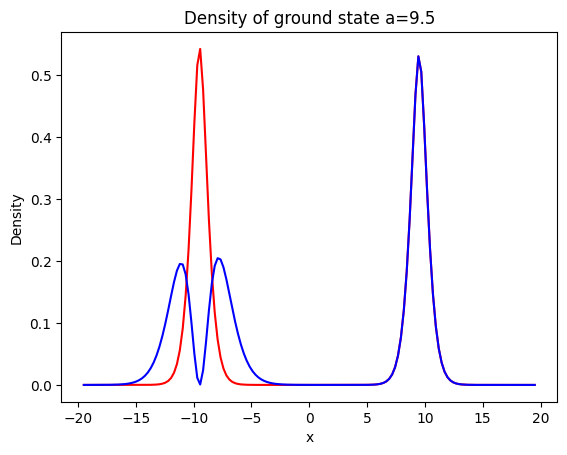

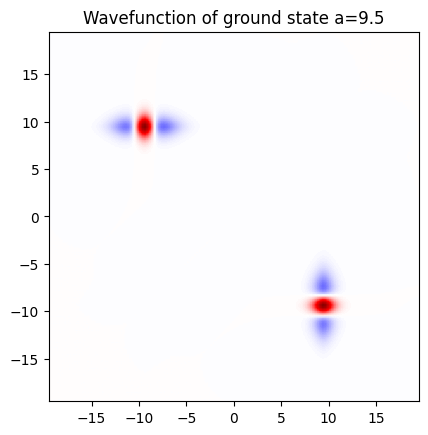

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.3543135792536054
-1.7522192760535318


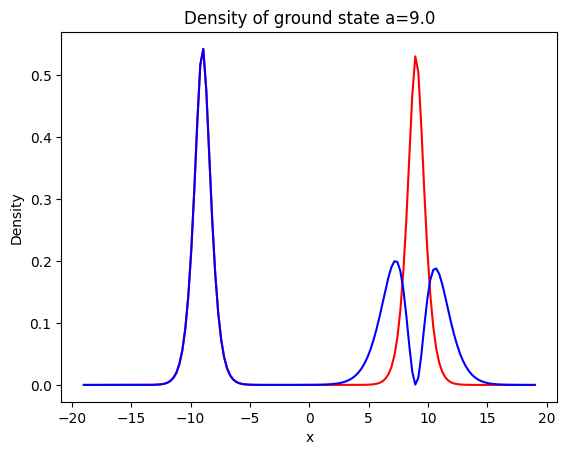

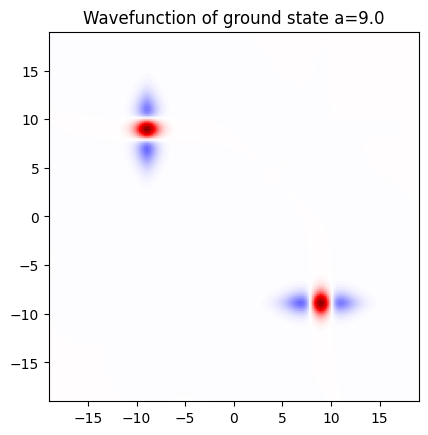

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.362387793876759
-1.7299494886077196


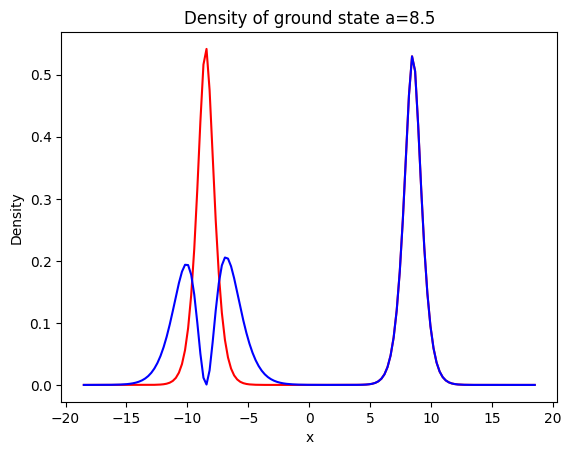

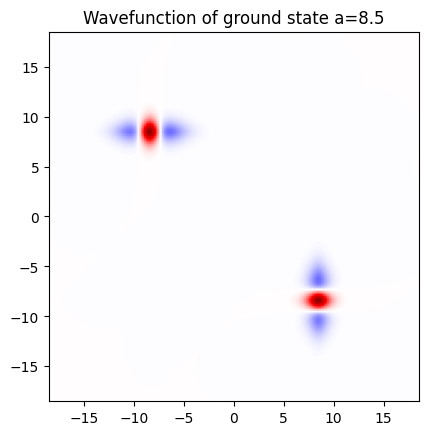

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.371459793302241
-1.770295532883754


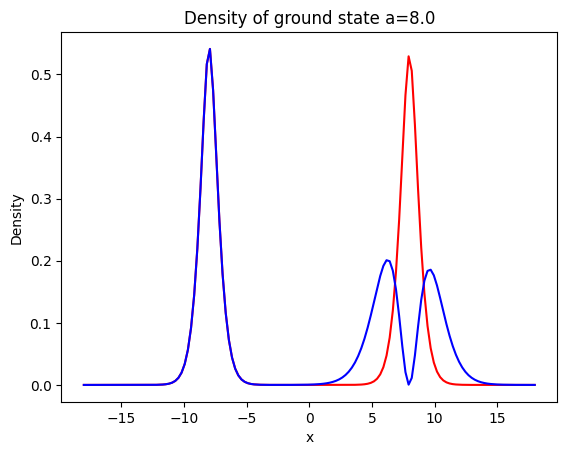

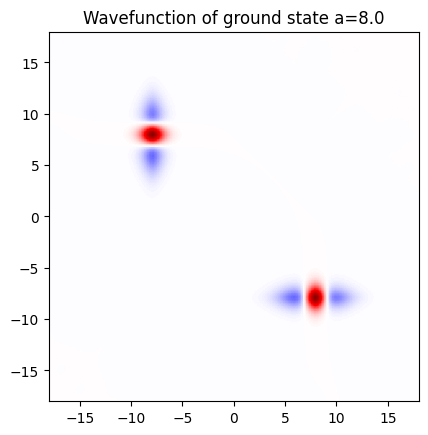

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.3817206185886093
-1.7502635414348287


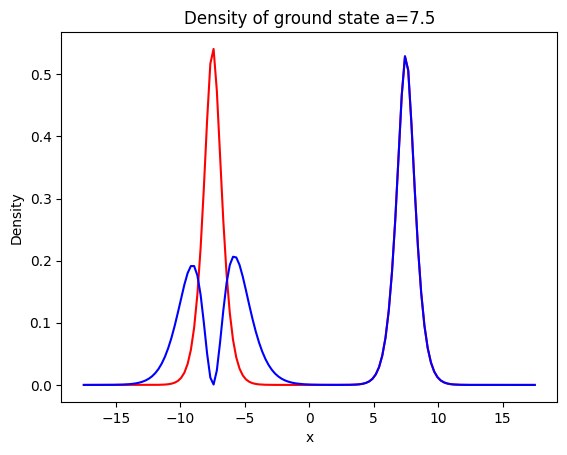

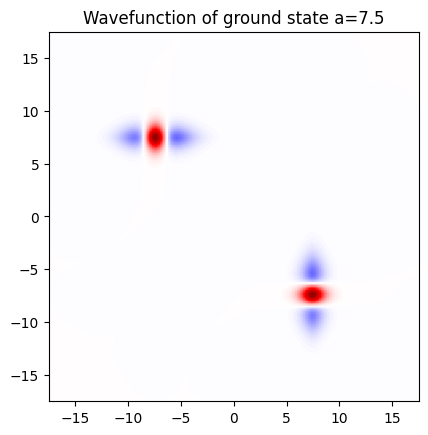

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.393412978741688
-1.762581852980273


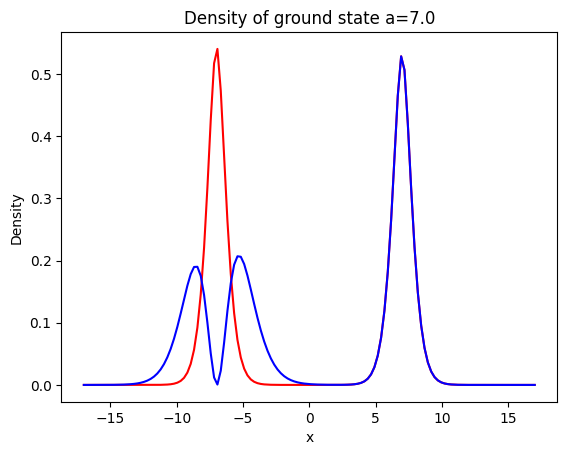

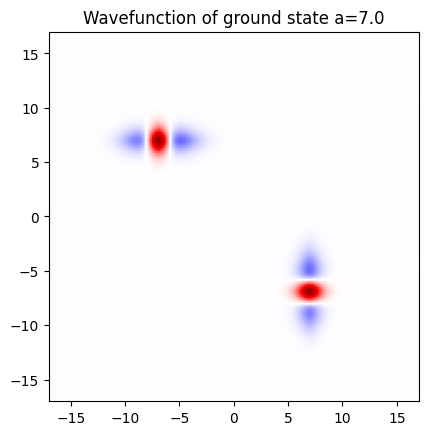

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.406850000657016
-1.7767883958710748


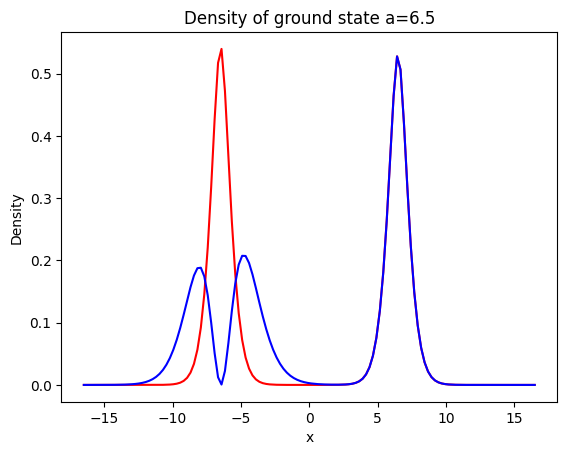

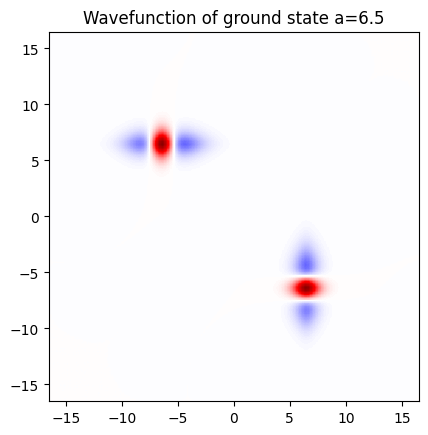

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.422442822793078
-1.7933660483986502


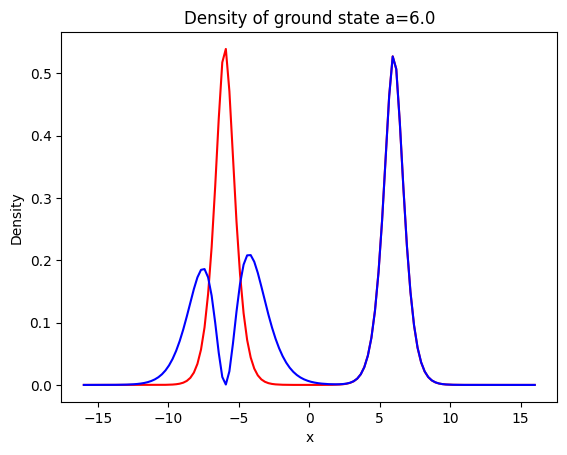

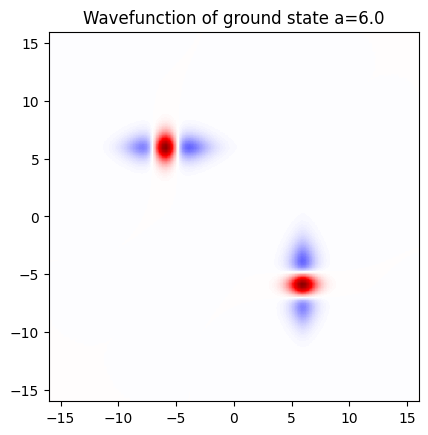

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.4407423466138156
-1.8129843041110174


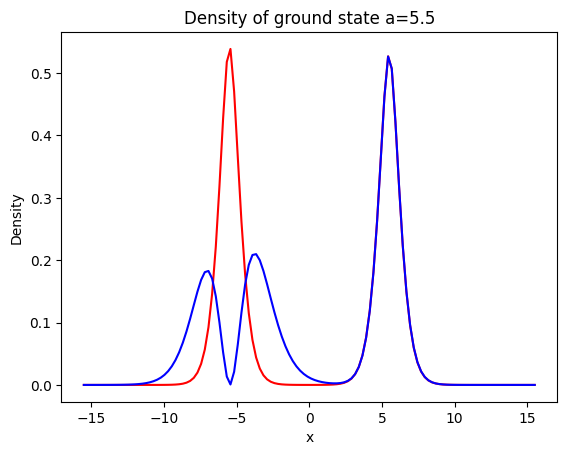

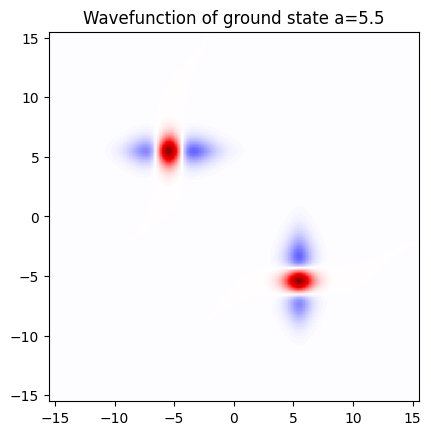

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.462504475593556
-1.8365864005974035


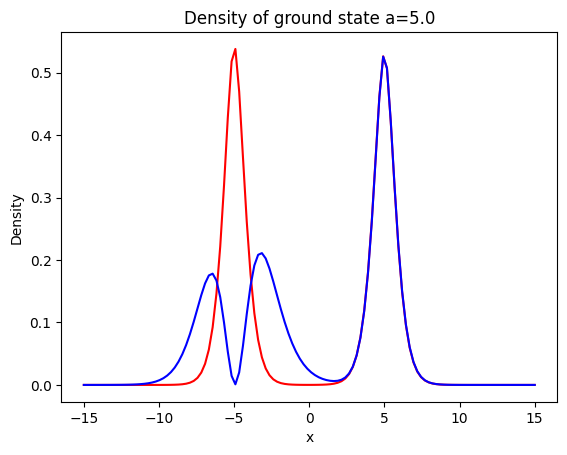

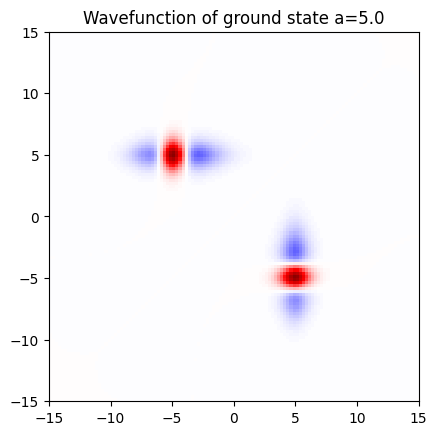

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.488795937050513
-1.8654757158939084


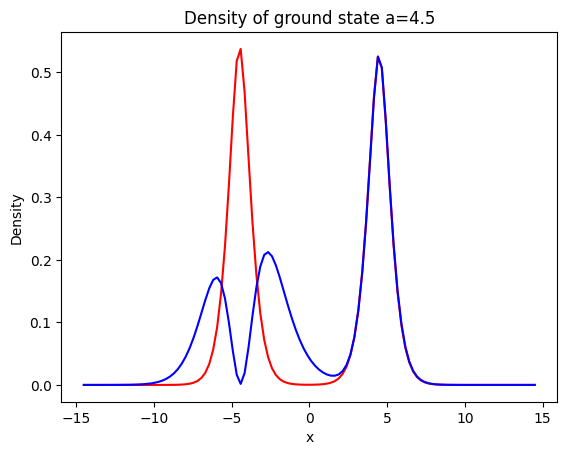

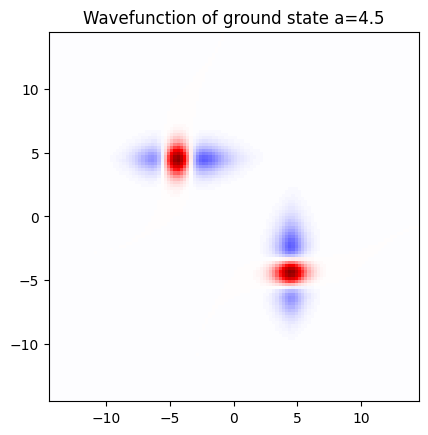

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.521173252347839
-1.9012641387269082


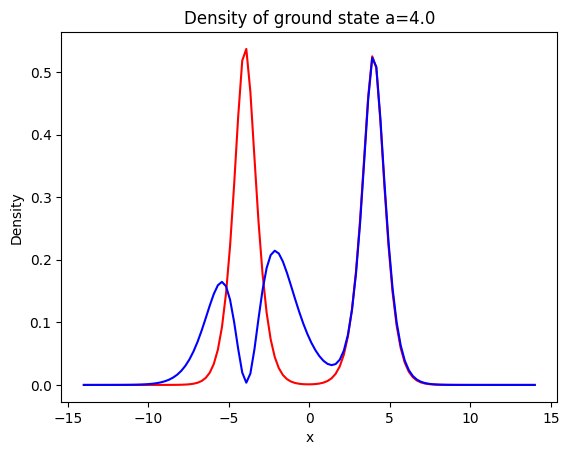

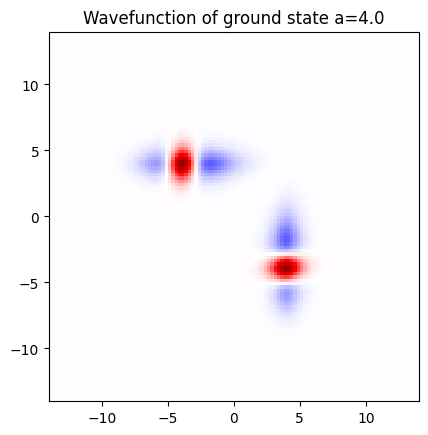

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.5619967511894286
-1.9453433797652797


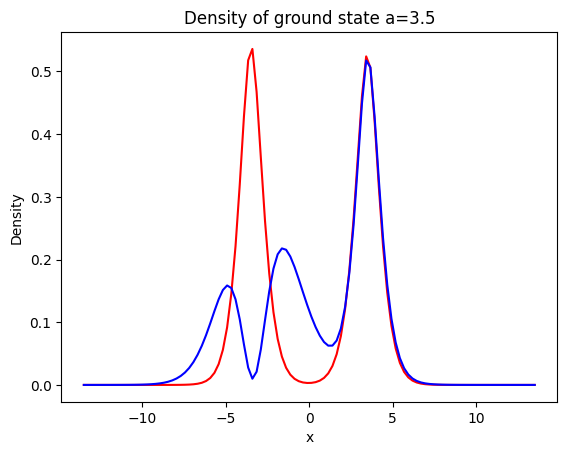

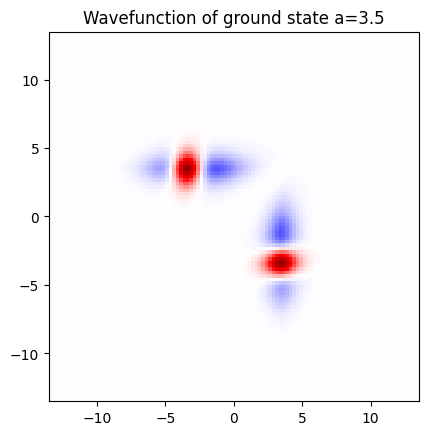

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.614975683473003
-1.9973668828270996


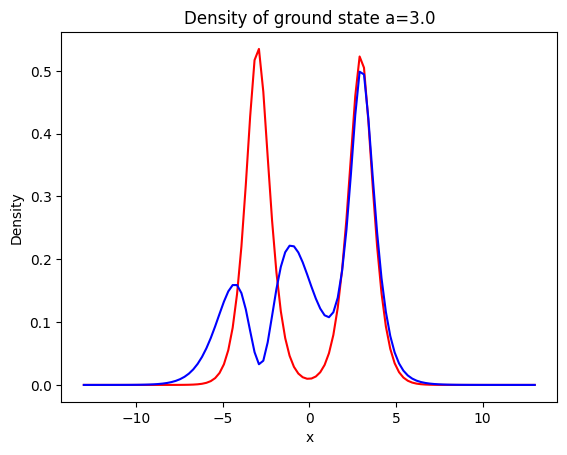

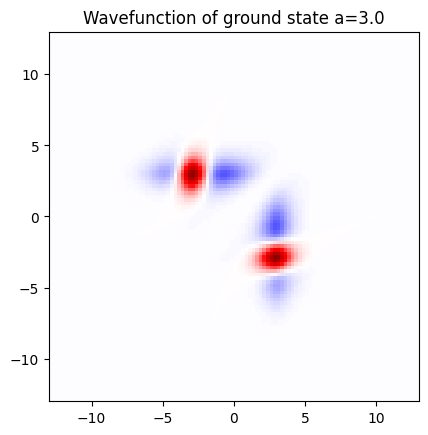

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.6859257130402585
-2.052140856526965


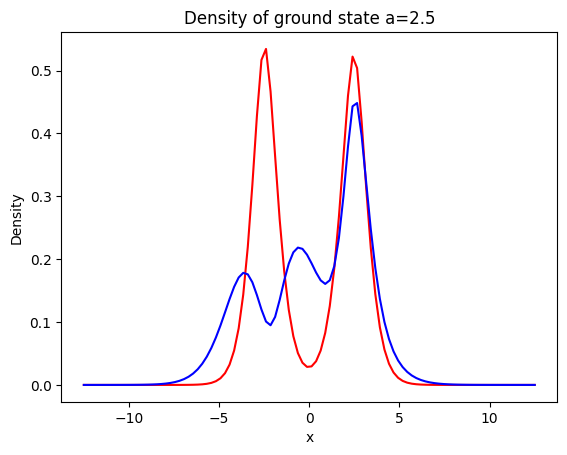

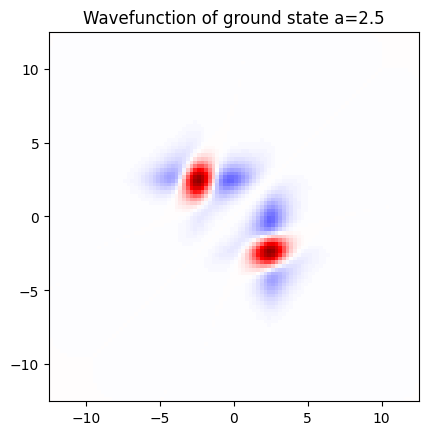

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.7827314542121226
-2.098889464112674


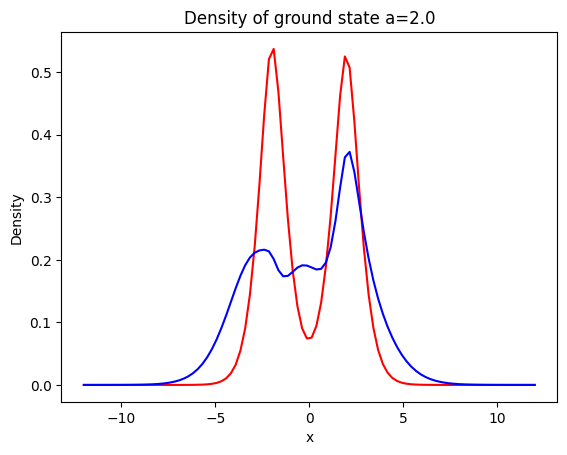

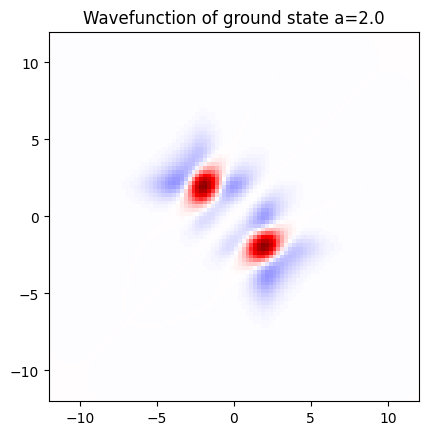

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-2.9107665577979445
-2.172876412064536


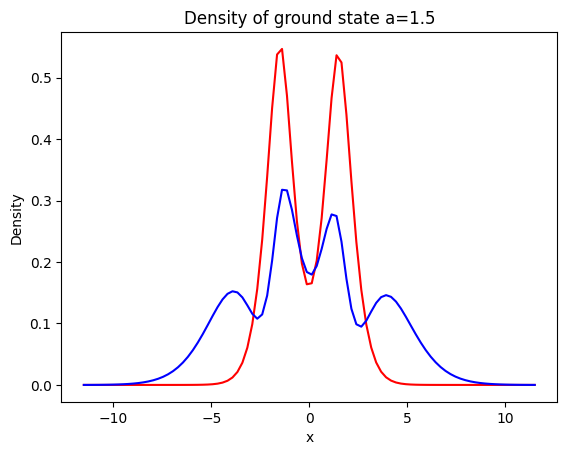

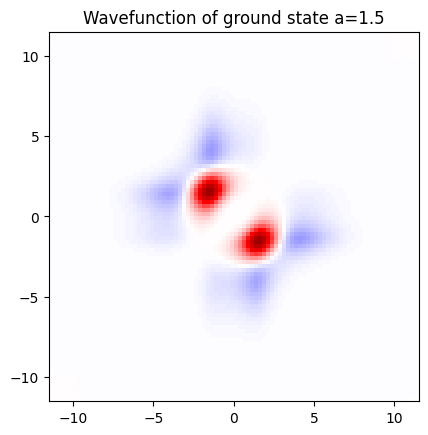

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-3.0607633562726053
-2.378630123754488


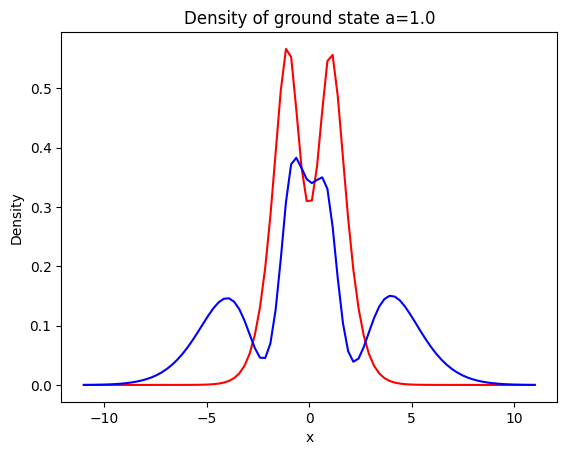

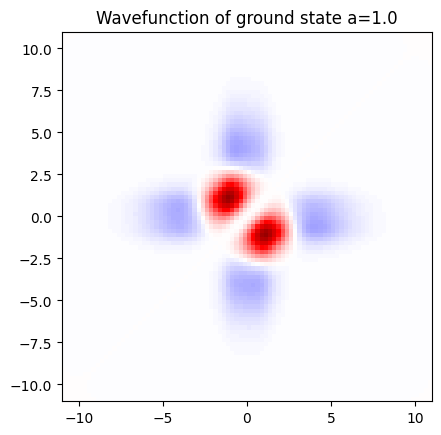

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-3.211606846583389
-2.653061065947461


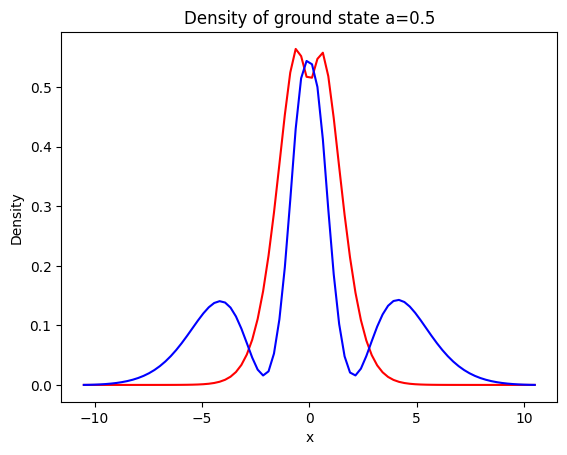

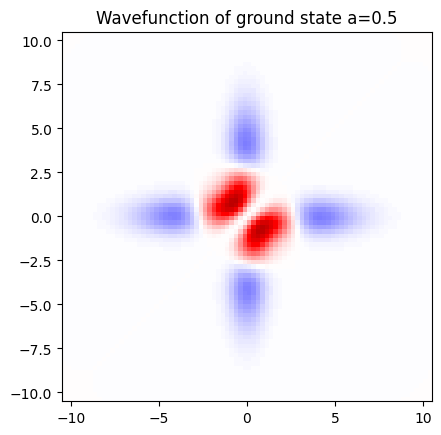

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
-3.32132337641906
-2.83520106202472


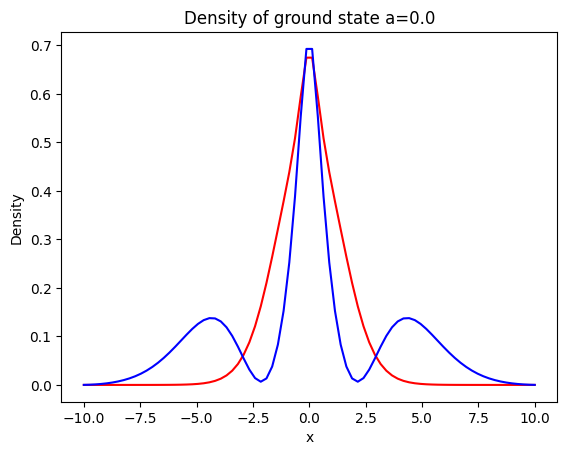

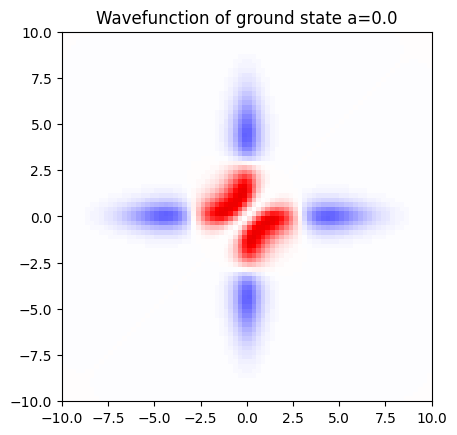

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import iDEA
import imageio.v2 as imageio

filenames = []
filenames2 = []
a = 10
da = 0.5
energies = np.zeros([1+int(a/da)])
it = int(a/da)
dx = 0.25

while a >= 0:
    
    #Seting up the system
    x = np.linspace(-(a+10),(a+10),int((2*a+20)/dx))
    v_ext = (-1.9 / (abs(x-a) + 1.0)) + (-2.0 / (abs(x+a) + 1.0))
    v_int = iDEA.interactions.softened_interaction(x)
    s = iDEA.system.System(x, v_ext, v_int, electrons='uu')

    #Solving for the first energy state.
    state_1 = iDEA.methods.interacting.solve(s, k=0)
    state_2 = iDEA.methods.interacting.solve(s, k=2)
    #Calculating the density of the state.
    n_1 = iDEA.observables.density(s, state=state_1)
    n_2 = iDEA.observables.density(s, state=state_2)
    print(state_1.energy)
    print(state_2.energy)
    #Stores the energy of the state in an array.
    #energies[it] = state_n.energy + 1/(abs(2*a) + 1.0)
    
    #anyti_sym_state_1 = state_1.space - np.moveaxis(state_1.space,0,1)
    #anyti_sym_state_1 /= np.sqrt(np.trapz(np.trapz(abs(anyti_sym_state_1)**2)))*s.dx
    #anyti_sym_state_2 = state_2.space - np.moveaxis(state_2.space, 0, 1)
    #anyti_sym_state_2 /= np.sqrt(np.trapz(np.trapz(abs(anyti_sym_state_2)**2)))*s.dx
    
    #Plots the results.
    plt.plot(s.x, n_1, 'r-')
    plt.plot(s.x, n_2, 'b-')
    #plt.plot(s.x, (2*np.trapz(abs(anyti_sym_state_1[:,:])**2,axis=1)*s.dx), 'g--')
    #plt.plot(s.x, (2*np.trapz(abs(anyti_sym_state_2[:,:])**2,axis=1)*s.dx), 'k--')
    plt.xlabel("x")
    plt.ylabel("Density")
    plt.title("Density of ground state a=%a" %a)
    filename = f"{a}density.png"
    filenames.append(filename)
    plt.savefig(filename)
    plt.show()
    plt.close()
    
    D = np.sum(np.sum(abs(state_1.full)**2,axis=1),axis=-1) - np.sum(np.sum(abs(state_2.full)**2,axis=1),axis=-1)
    #print(np.max(D))

    plt.imshow(D, origin='lower', extent=[-(a+10), (a+10), -(a+10), (a+10)], cmap="seismic", vmax=0.15, vmin=-0.15)
    plt.title("Wavefunction of ground state a=%a" %a)
    filename = f"{a}wavefunction.png"
    filenames2.append(filename)
    plt.savefig(filename)
    plt.show()
    plt.close()
    
    a -= da
    it -= 1
    
#Makes a gif of the density plots.
with imageio.get_writer('density.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

#Makes a gif of the wavefunction plots.
with imageio.get_writer("wavefunction.gif", mode="I") as writer:
    for filename in filenames2:
        image = imageio.imread(filename)
        writer.append_data(image)

#Plots the energy against distance a.
#x = [i for i in range(len(energies))]
#plt.plot(x,energies)
#plt.xlabel("a")
#plt.ylabel("Energy")
#plt.title("Energy against distance from origin of potentials")
#plt.show()
#print(energies)